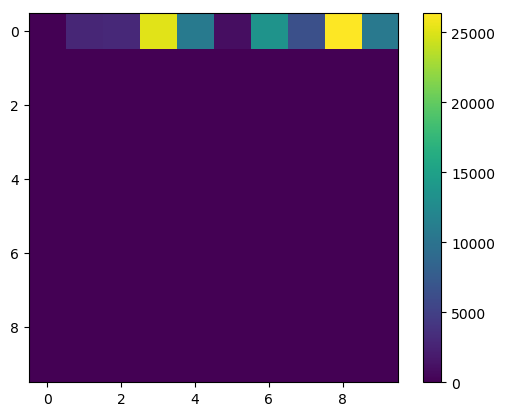

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função para inicializar os pesos do SOM
def inicializar_pesos(dim_entrada, dim_saida):
    pesos = np.random.random((dim_entrada, dim_saida))
    return pesos

# Função para encontrar o neurônio vencedor (BMU)
def encontrar_bmu(entrada, pesos):
    distancias = np.linalg.norm(entrada - pesos, axis=1)
    indice_bmu = np.argmin(distancias)
    return indice_bmu

# Função para atualizar os pesos dos neurônios vizinhos ao BMU
def atualizar_pesos(entrada, pesos, bmu, taxa_aprendizado, raio):
    dim_entrada, dim_saida = pesos.shape
    for i in range(dim_saida):
        distancia_bmu = np.abs(i - bmu)
        if distancia_bmu <= raio:
            fator_aprendizado = taxa_aprendizado * (1 - distancia_bmu/raio)
            pesos[:, i] += fator_aprendizado * (entrada - pesos[:, i])

# Função para treinar o SOM
def treinar_som(dados, dim_saida, num_epocas, taxa_aprendizado, raio):
    dim_entrada = dados.shape[1]
    pesos = inicializar_pesos(dim_entrada, dim_saida)

    for epoca in range(num_epocas):
        for entrada in dados:
            bmu = encontrar_bmu(entrada, pesos)
            atualizar_pesos(entrada, pesos, bmu, taxa_aprendizado, raio)

    return pesos

# Função para visualizar os resultados do SOM
def visualizar_som(dados, pesos, dim_saida):
    dim_entrada = dados.shape[1]
    mapa = np.zeros((dim_saida, dim_saida))

    for entrada in dados:
        bmu = encontrar_bmu(entrada, pesos)
        mapa[bmu // dim_saida, bmu % dim_saida] += 1

    plt.imshow(mapa)
    plt.colorbar()
    plt.show()

# Carregando os dados
dados = np.loadtxt('new_diabetes.csv', delimiter=',')  # Substitua 'diabetes.csv' pelo nome do seu arquivo de dados

# Normalizando os dados
dados = (dados - np.min(dados, axis=0)) / (np.max(dados, axis=0) - np.min(dados, axis=0))

# Definindo os hiperparâmetros do SOM
dim_saida = 10
num_epocas = 10
taxa_aprendizado = 0.1
raio = 2

# Treinando o SOM
pesos = treinar_som(dados, dim_saida, num_epocas, taxa_aprendizado, raio)

# Visualizando os resultados
visualizar_som(dados, pesos, dim_saida)
